# Exploratory Data Analysis:
## Music mood preference, mental health referrals and their correlations between the years 2018-2022

The following report aims to understand general trends in music mood preferences via streaming data for the UK, as well as general trends in mental health referrals. The report does so with the aim of understanding the relationship between preferred music moods and levels of mental health in the uk population as a hole, to determine if music can be a mental health regulator. 

Observing differences in the variables and their relationships during and before the pandemic can add depth to our understanding of mental health self regulation. 

In [1]:
# import packages 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt



In [2]:
# read in data

# music data
track_data = pd.read_csv('../../datasets/popular_tracks_and_moods.csv')

# mental health data, date manipulated
health_data = pd.read_csv('../../datasets/NHS_cleaned/NHS_manual_data_cleaned_reformat.csv')

# mental health data
mental_health_data = pd.read_csv('../../datasets/NHS_cleaned/NHS_manual_data_cleaned.csv')


In [3]:
#this cell is only used to look at data. The code here is commented out to prevent data dumping. 
#track_data['mood'].describe()
#mental_health_data

## Trends in annual mental health referrals 

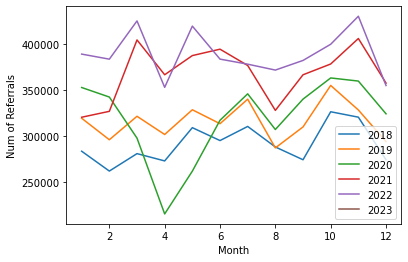

In [4]:
#looking at trends in the date manipulated mental health data 

#define index column
health_data.set_index('month', inplace = True)

#group data by year and display referrals as line chart, store to plot object
hd = health_data.groupby('year')['no_of_referrals']

#plotting
hd.plot()
plt.legend(loc='lower right')
plt.xlabel("Month")
plt.ylabel("Num of Referrals")
plt.show()

The general annual trend in mental health referrals show that the need for mental health services is much higher during the winter months than the summer months. We anticipated pre-pandemic years to display similar levels of mental health referrals. However, the data shows that the amount of referrals to mental health services increased from 2018 to 2019. The pre-pandemic years' data however, do show similarity in seasonality. Overall, during the pre-pandemic years, the number of referrals are highest around the start of the colder season, but decrease drastically in December. February has the least amount of mental health referrals, and the levels increase in a staggered pattern over the following months leading up to summer. 

The first half of the year 2020 does not follow the typical pre-pandemic seasonal pattern. The 26rd March 2020 marks the date on which lock down measures legally come into force, resulting in the low referral rate in the fourth and fifth month of the year, as patients and doctors struggled to find methods of admittance or treatment given the lock down measures. The second half of 2020 however, shows continued seasonal patterns in referral rates, similar to the pre-pandemic years, albeit in increased amounts. 

March of 2021 marks a year since the enforcement of the COVID-19 lock down, and despite the loosening of the social meeting measures in March 2021, this month shows a significant increase in the amount of referrals. 
In the summer of 2021, from months June to August, the number of referrals decrease drastically as well, presumably because of further relaxations in lock down measures as individuals regain normalcy in life. This period comes right after wider social contact and non-essential retail have been allowed to reopen. 
The year 2022 display some of the seasonality in referral rates in the pre-pandemic years. However, it is worth noting that the months that typically have peaks show drastic surges in mental health referrals. 

## General trends in music preferences: pre-pandemic and post-pandemic

In [5]:
# filter mood data by year. This step creates a new dataframe, but does not output anything to prevent data dumping

#convert track_data date column to datetime format
track_data['date'] = pd.to_datetime(track_data['date'])

#filter mood data by year 2018
tracks_2018 = track_data.query('date.dt.year == 2018')
tracks_2018 = tracks_2018.filter(['date', 'mood'])

#filter mood data by year 2019
tracks_2019 = track_data.query('date.dt.year == 2019')
tracks_2019 = tracks_2019.filter(['date', 'mood'])

#filter mood data by year 2020
tracks_2020 = track_data.query('date.dt.year == 2020')
tracks_2020 = tracks_2020.filter(['date', 'mood'])

#filter mood data by year 2021
tracks_2021 = track_data.query('date.dt.year == 2021')
tracks_2021 = tracks_2021.filter(['date', 'mood'])

#filter mood data by year 2022
tracks_2022 = track_data.query('date.dt.year == 2022')
tracks_2022 = tracks_2022.filter(['date', 'mood'])

#filter mood data by year 2023
tracks_2023 = track_data.query('date.dt.year == 2023')
tracks_2023 = tracks_2023.filter(['date', 'mood'])

#instantiate empty dataframe to append 
track_moods_annual = pd.DataFrame()

#add filtered data as a column to above df
track_moods_annual['year_2018'] = tracks_2018.groupby('mood').count()
track_moods_annual['year_2019'] = tracks_2019.groupby('mood').count()
track_moods_annual['year_2020'] = tracks_2020.groupby('mood').count()
track_moods_annual['year_2021'] = tracks_2021.groupby('mood').count()
track_moods_annual['year_2022'] = tracks_2022.groupby('mood').count()
track_moods_annual['year_2023'] = tracks_2023.groupby('mood').count()


track_moods_annual.reset_index(level = ['mood'], inplace = True)
#track_moods_annual

#convert table shape for seaboarn plotting
track_moods_m = track_moods_annual.melt(id_vars='mood')
track_moods_m.rename(columns={'mood': 'mood', 'variable': 'years', 'value': 'count_of_mood'}, inplace=True)
#track_moods_m

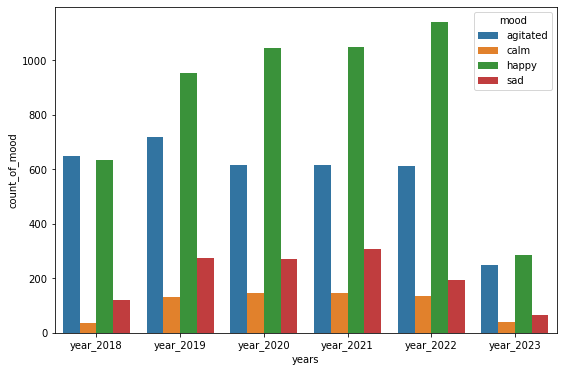

In [35]:
#visualizing the moods per year to understand trends
fig, ax = plt.subplots(figsize=(9, 6))
moods_per_year = sns.barplot(data=track_moods_m, 
                             x='years', 
                             y='count_of_mood', 
                             hue='mood', 
                             ax =ax)
fig.suptitle = "Music moods over the years"

Here, the years can be classified as pre-pandemic, pandemic, and post-pandemic years as follows:
- Pre pandemic years =2018 and 2019
- Pandemic years= 2020 and 2021
- Post pandemic = 2022

General trends in music preference shows that in streamed music, music that can be classified as happy music is significantly more popular than music in any other genre. Music that can be classified as having an agitated mood has been consistently preferred in the second position. Sad music is the third most popular music mood and music that can be classified as calm is the least common in the streamed music data. While this general pattern stays consistent in the years, we can also see an increase in commonly streamed sad music during the pandemic years- that is, year 2020 and 2021. In 2022 directly after the COVID-19 restrictions were lifted, the amount of popularly streamed sad music shows a significant reduction. This trend can be dissected better in the next set of charts. 
The general annual trends also show that happy music did not show an increase in consumption during th pandemic years.



## Trends in popularity of music moods over the years observed

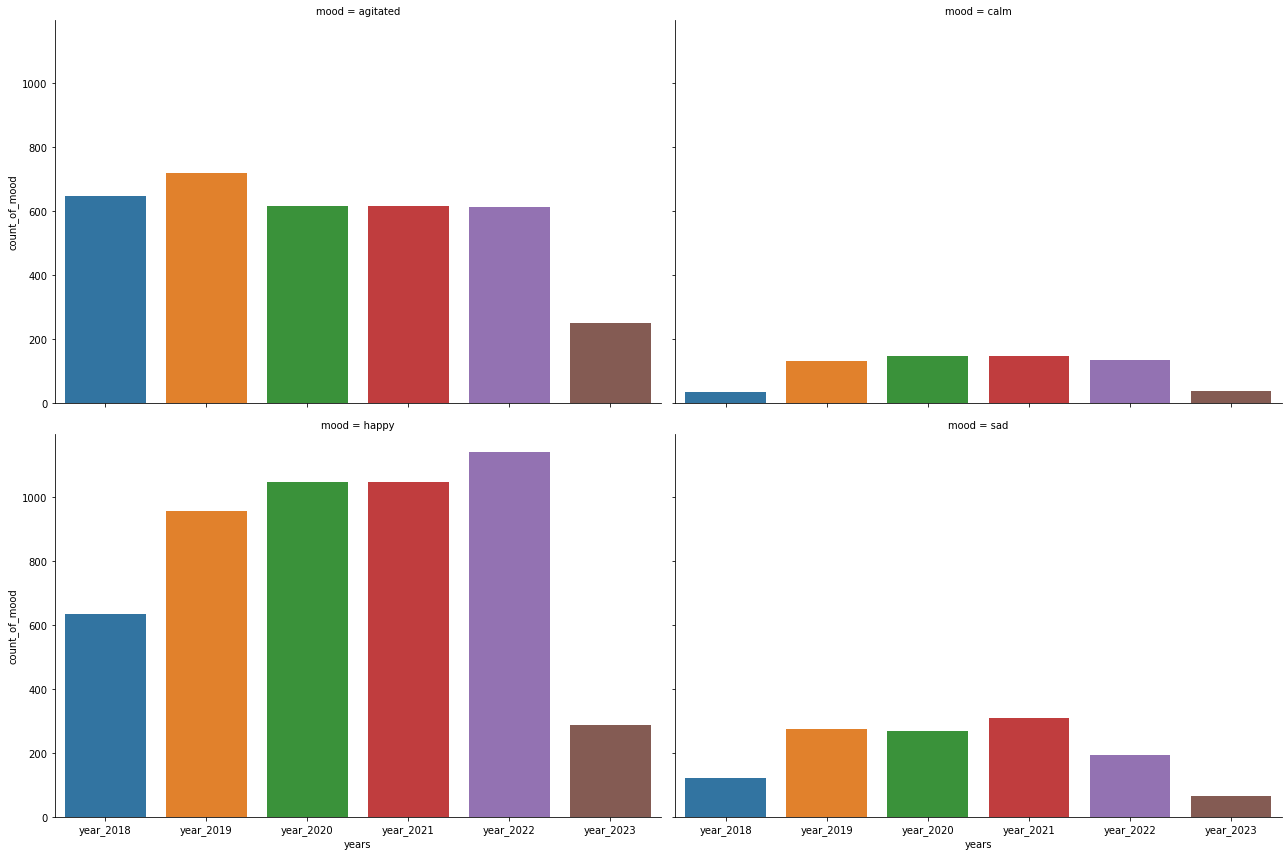

In [7]:
p = sns.catplot(kind='bar', 
                data=track_moods_m, 
                x='years', 
                y='count_of_mood', 
                col='mood', 
                height=6, 
                aspect=1.5, 
                col_wrap =2)


A comparison of the count plots above show that music listening preferences may have been impacted by the COVID-19 pandemic. At this stage the cause of the changes or trends in music preference over the years cannot be ascertained, but this visualization encourages us to look for correlations between mental health referrals and the count of sad music listened to. 

The sharpest changes in listening patterns we observe from these mood based frequency charts is that in the year directly following the pandemic, there is a significant increase in the popularity of happy music, as well as a decrease in popularity of sad music. Where streaming popularity of sad music is concerned, it is important to also note the drastic increase in streaming between 2018 and 2019, suggesting that while there might be a correlation between streaming popularity of sad music and number of mental health referrals, there may be external factors that correlate with both sad music's popularity and the increases in mental health referrals.

An interesting observation is also that music classified as agitated has become less popular during the pandemic and remained consistently this way, compared to the pre-pandemic years. 

## Correlations between frequency of music moods and number of mental health referrals

In [8]:
#create a dataframe of monthly mood counts
track_data['date'] = pd.to_datetime(track_data['date'])
monthly_mood_data = track_data.groupby([track_data.date.dt.to_period('M'), 'mood'])['mood'].count().unstack(level=-1, fill_value=0).reset_index()

# setting up date and month columns in monthly mood data so enable merge
monthly_mood_data['year'] = pd.to_numeric(monthly_mood_data['date'].dt.strftime('%Y'))
monthly_mood_data['month'] = pd.to_numeric(monthly_mood_data['date'].dt.strftime('%m'))

#monthly_mood_data

#setting up the health data to merge
health_data.reset_index(inplace=True)
#health_data



In [9]:
#combine dataframes to show monthly moods and referrals
combined = monthly_mood_data.merge(health_data, on=['month','year'])
combined.head(5)

#DURING PANDEMIC
# Filter data between two dates marking the pandemic
pandemic_df = combined.loc[(combined['date'] >= '2020-01')
                     & (combined['date'] <= '2021-07')]
# Display
#pandemic_df

#BEFORE PANDEMIC
# Filter data for dates before the pandemic
before_pandemic_df = combined.loc[(combined['date'] <= '2020-01-03')]
# Display
#before_pandemic_df

In [10]:
#DURING PANDEMIC
# developing a small correlation matrix
pandemic_factors_corr = pandemic_df.corr()    # .round(decimals = 2)

# checking the correlations of the of the mood variables with referrals
pandemic_factors_corr.loc['no_of_referrals', # Y-variable
               ['agitated', # X-variables
                'calm', 
                'happy', 
                'sad']] \
                .sort_values(ascending = False)

agitated    0.355453
sad         0.327979
calm       -0.030430
happy      -0.352380
Name: no_of_referrals, dtype: float64

In [11]:
#BEFORE PANDEMIC
# developing a small correlation matrix
before_pandemic_corr = before_pandemic_df.corr()    # .round(decimals = 2)

# checking the correlations of the mood variables with referrals
before_pandemic_corr.loc['no_of_referrals',  # Y-variable
               ['agitated', # X-variables
                'calm', 
                'happy', 
                'sad']] \
                .sort_values(ascending = False)

happy       0.426347
sad         0.346194
calm        0.222431
agitated   -0.054151
Name: no_of_referrals, dtype: float64

We observe a stronger positive correlation between the number of mental health referrals and sad and agitated music mood preferences, as well as a small but negative correlation between number of mental health referrals and happy and calm music mood preferences, during the COVID 19 pandemic. In simple terms, this means that during the period of the COVID-19 pandemic, there was a direct relationship with the UK population as a whole showing increased preference for songs with agitated or sad moods, and the increases in the demand for mental health services. Similarly, during the pandemic period between January 2020 and July 2021, when happy music or calm music was preferred by the population as a whole, the demand for mental health services during the corresponding period  is lower. 

The same is however, not observed during the pre-pandemic period. 

### Relationship between occurrence of sad mood music and mental health referrals: pandemic and pre-pandemic

Text(0.5, 0.98, 'correlation between sad music hearing and num of mental health referrals- pandemic')

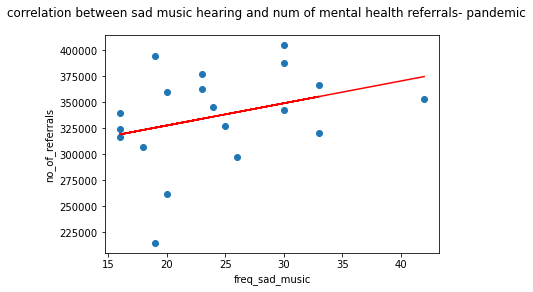

In [23]:
# sad music during pandemic
#create scatter plot
plt.scatter(pandemic_df['sad'], pandemic_df['no_of_referrals'])


#add axis labels
plt.xlabel('freq_sad_music')
plt.ylabel('no_of_referrals')
m, b = np.polyfit(pandemic_df['sad'], pandemic_df['no_of_referrals'], 1)
plt.plot(pandemic_df['sad'], m*pandemic_df['sad'] + b, 'r')
plt.suptitle("correlation between sad music hearing and num of mental health referrals- pandemic")

Text(0.5, 0.98, 'correlation between sad music hearing and num of mental health referrals- pre-pandemic')

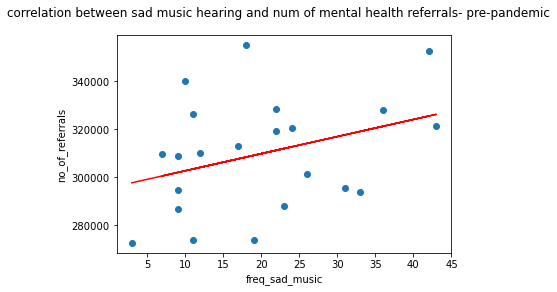

In [24]:
# sad music before pandemic
#create scatter plot
plt.scatter(before_pandemic_df['sad'], before_pandemic_df['no_of_referrals'])


#add axis labels
plt.xlabel('freq_sad_music')
plt.ylabel('no_of_referrals')
m, b = np.polyfit(before_pandemic_df['sad'], before_pandemic_df['no_of_referrals'], 1)
plt.plot(before_pandemic_df['sad'], m*before_pandemic_df['sad'] + b, 'r')
plt.suptitle("correlation between sad music hearing and num of mental health referrals- pre-pandemic")

Notice between these two charts displaying the number of referrals at each monthly count of sad music streamed, the number of mental health referrals during the pandemic- displayed in the y axis- is significantly more during the pandemic. While there is a similar implied correlation based on the best fit line, it is worth considering that weekly data would have been more preferable, as it would show correlations better. 

### Relationship between occurrence of happy mood music and mental health referrals: pandemic and pre-pandemic

Text(0.5, 0.98, 'correlation between happy music hearing and num of mental health referrals- pandemic')

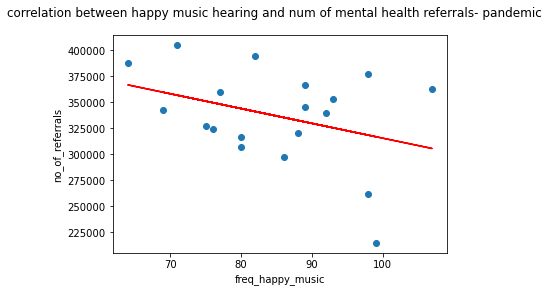

In [22]:
# happy music during pandemic
#create scatter plot
plt.scatter(pandemic_df['happy'], pandemic_df['no_of_referrals'])


#add axis labels
plt.xlabel('freq_happy_music')
plt.ylabel('no_of_referrals')
m, b = np.polyfit(pandemic_df['happy'], pandemic_df['no_of_referrals'], 1)
plt.plot(pandemic_df['happy'], m*pandemic_df['happy'] + b, 'r')
plt.suptitle("correlation between happy music hearing and num of mental health referrals- pandemic")

Text(0.5, 0.98, 'correlation between happy music hearing and num of mental health referrals- pre-pandemic')

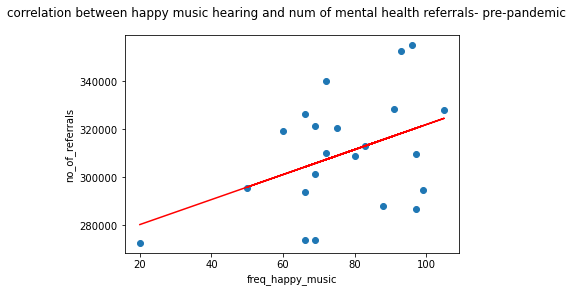

In [21]:
# happy music before pandemic
#create scatter plot
plt.scatter(before_pandemic_df['happy'], before_pandemic_df['no_of_referrals'])


#add axis labels
plt.xlabel('freq_happy_music')
plt.ylabel('no_of_referrals')
m, b = np.polyfit(before_pandemic_df['happy'], before_pandemic_df['no_of_referrals'], 1)
plt.plot(before_pandemic_df['happy'], m*before_pandemic_df['happy'] + b, 'r')
plt.suptitle("correlation between happy music hearing and num of mental health referrals- pre-pandemic")

Negative relationship in the pandemic years between frequency of happy music streamed and number of mental health referrals suggests that there can be a positive effect of listening to happy music at times of turmoil. During typically less tumultuous periods of time, such as the pre-pandemic era, this is not observed, and it can be assumed that music plays a less significant role in mental health regulation.

### Relationship between occurrence of calm mood music and mental health referrals: pandemic and pre-pandemic

Text(0.5, 0.98, 'correlation between calm music listening and num of mental health referrals- pandemic')

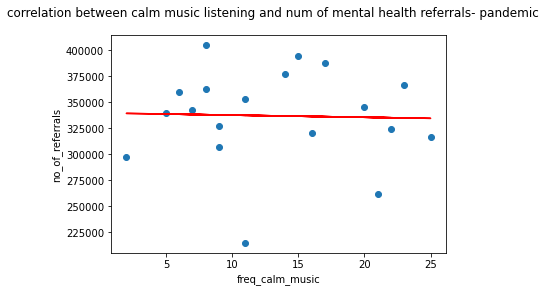

In [26]:
# calm music during pandemic
#create scatter plot
plt.scatter(pandemic_df['calm'], pandemic_df['no_of_referrals'])


#add axis labels
plt.xlabel('freq_calm_music')
plt.ylabel('no_of_referrals')
m, b = np.polyfit(pandemic_df['calm'], pandemic_df['no_of_referrals'], 1)
plt.plot(pandemic_df['calm'], m*pandemic_df['calm'] + b, 'r')
plt.suptitle("correlation between calm music listening and num of mental health referrals- pandemic")

Text(0.5, 0.98, 'correlation between calm music listening and num of mental health referrals- pre-pandemic')

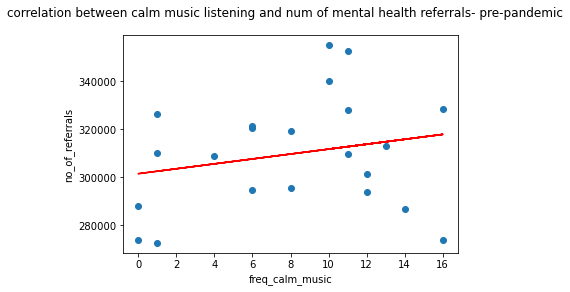

In [27]:
# calm music before pandemic
#create scatter plot
plt.scatter(before_pandemic_df['calm'], before_pandemic_df['no_of_referrals'])


#add axis labels
plt.xlabel('freq_calm_music')
plt.ylabel('no_of_referrals')
m, b = np.polyfit(before_pandemic_df['calm'], before_pandemic_df['no_of_referrals'], 1)
plt.plot(before_pandemic_df['calm'], m*before_pandemic_df['calm'] + b, 'r')
plt.suptitle("correlation between calm music listening and num of mental health referrals- pre-pandemic")

### Relationship between occurrence of agitated mood music and mental health referrals: pandemic and pre-pandemic

Text(0.5, 0.98, 'correlation between agitated music listening and num of mental health referrals- pandemic')

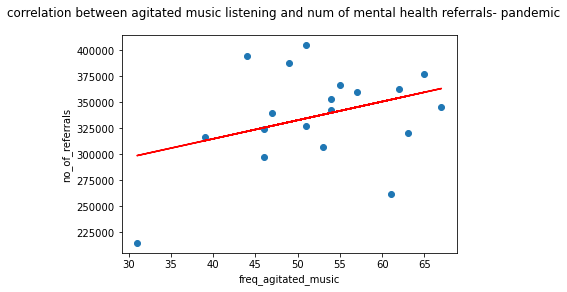

In [28]:
# agitated music during pandemic
#create scatter plot
plt.scatter(pandemic_df['agitated'], pandemic_df['no_of_referrals'])


#add axis labels
plt.xlabel('freq_agitated_music')
plt.ylabel('no_of_referrals')
m, b = np.polyfit(pandemic_df['agitated'], pandemic_df['no_of_referrals'], 1)
plt.plot(pandemic_df['agitated'], m*pandemic_df['agitated'] + b, 'r')
plt.suptitle("correlation between agitated music listening and num of mental health referrals- pandemic")

Text(0.5, 0.98, 'correlation between agitated music listening and num of mental health referrals- pre-pandemic')

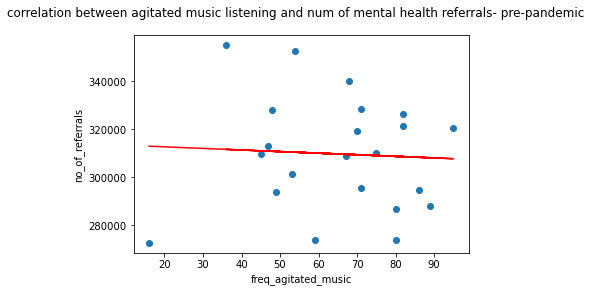

In [29]:
# agitated music before pandemic
#create scatter plot
plt.scatter(before_pandemic_df['agitated'], before_pandemic_df['no_of_referrals'])


#add axis labels
plt.xlabel('freq_agitated_music')
plt.ylabel('no_of_referrals')
m, b = np.polyfit(before_pandemic_df['agitated'], before_pandemic_df['no_of_referrals'], 1)
plt.plot(before_pandemic_df['agitated'], m*before_pandemic_df['agitated'] + b, 'r')
plt.suptitle("correlation between agitated music listening and num of mental health referrals- pre-pandemic")

## Shortcomings

- Correlation data is limited, as we only have monthly mental health referral data. 
- This data will not suffice to create a predictive model predicting number of referrals based on music mood preference of the population as we do not have sufficient data points.
- There are a myriad of other factors that impact amount of referrals, as the correlations observed here are weak. 